## Installing necessary Dependencies

In [ ]:
!git --version

git version 2.34.1


In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 98333, done.
remote: Counting objects: 100% (840/840), done.
remote: Compressing objects: 100% (456/456), done.
remote: Total 98333 (delta 443), reused 700 (delta 363), pack-reused 97493 (from 1)
Receiving objects: 100% (98333/98333), 621.96 MiB | 23.97 MiB/s, done.
Resolving deltas: 100% (71436/71436), done.


## Mounting the Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
dir = '/content/gdrive/My Drive/Dataset numpy array(converted)'

## Importing the necessary Libraries

In [ ]:
import os
import cv2
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt

## Pre-trained SSD MobileNetV2 Model's URL

In [ ]:
ssd_mobilenet_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"

ssd_mobilenet_v2 = hub.KerasLayer(ssd_mobilenet_url, trainable=False)

## Loading, Preprocessing and Predicting Objects

In [ ]:
# Loading the SSD MobileNetV2 model
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    '''image = tf.image.convert_image_dtype(image, dtype=tf.uint8)'''
    image = tf.image.resize(image, [320, 320])
    image = tf.cast(image, dtype=tf.uint8)
    image = tf.expand_dims(image, axis=0)
    return image


image_path = dir + "/berlin_000021_000019_leftImg8bit.png"
image = preprocess_image(image_path)
print(type(image))
result = detector(image)

# Extract the results
boxes = result["detection_boxes"]
scores = result["detection_scores"]
classes = result["detection_classes"]

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
print(type(result))

<class 'dict'>


## Displaying the Output

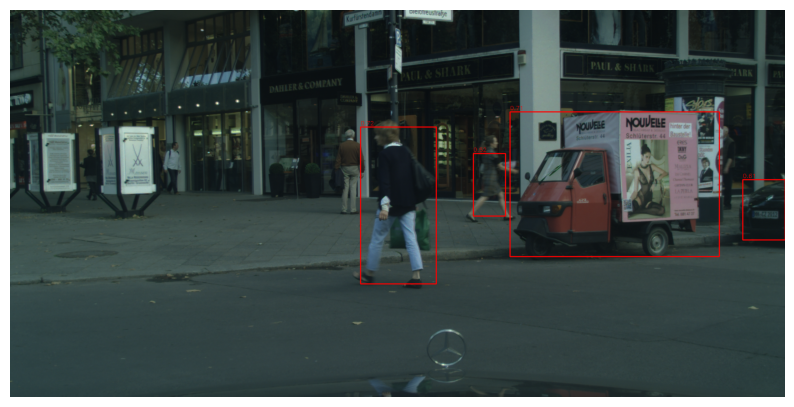

In [ ]:
# Load your image
image = cv2.imread(dir + "/berlin_000021_000019_leftImg8bit.png")  # Replace 'path_to_image' with the path to your image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, _ = image.shape

# Extract bounding boxes and scores
bounding_boxes = result['detection_boxes'][0].numpy()  # Replace with your bounding box tensor
scores = result['detection_scores'][0].numpy()         # Replace with your score tensor

confidence_threshold = 0.5

# Draw bounding boxes on the image
for i in range(len(scores)):
    if scores[i] > confidence_threshold:
        ymin, xmin, ymax, xmax = bounding_boxes[i]
        (left, right, top, bottom) = (xmin * width, xmax * width, ymin * height, ymax * height)

        # Draw the box
        cv2.rectangle(image_rgb, (int(left), int(top)), (int(right), int(bottom)), (255, 0, 0), 2)

        # Display score
        cv2.putText(image_rgb, f'{scores[i]:.2f}', (int(left), int(top) - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
